<a href="https://colab.research.google.com/github/anubhavgupta1/Foundations-of-Python/blob/master/12_pandas_data_frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/import/")
!ls

sample_data
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
ind1 = ["alice", "bob", "Charles","Darwin"]
aa = pd.Series([-2,3,4,-5], index= ind1)
aa

alice     -2
bob        3
Charles    4
Darwin    -5
dtype: int64

In [4]:
weights = {"alice" : 68, "bob" : 83, "Charles" : 86,"Darwin" : 38}
aaa = pd.Series(weights)
aaa

alice      68
bob        83
Charles    86
Darwin     38
dtype: int64

In [5]:
ind2 = ["Darwin","Charles"]
aaaa = pd.Series(weights, index= ind2)
aaaa

Darwin     38
Charles    86
dtype: int64

In [6]:
a = pd.DataFrame([aa,aaa,aaaa])
a

,alice,bob,Charles,Darwin
0,-2.0,3.0,4.0,-5.0
1,68.0,83.0,86.0,38.0
2,NaN,NaN,86.0,38.0


In [7]:
ind3 = ["alice", "bob", "Charles"]
ind4 = ["bob", "alice","Charles"]
ind5 = ["Charles","bob"]
ind6 = ["alice","bob"]
weight = pd.Series([68,83,112], index=ind3)
birthyear = pd.Series([1984,1985,1992], index=ind4)
children = pd.Series([0,3], index=ind5)
hobby = pd.Series(["biking","dancing"], index=ind6)
people_dict = {"Weights" : weight, "Birth" :birthyear,"Children": children, "Hobby" : hobby}
people = pd.DataFrame(people_dict)
people

,Weights,Birth,Children,Hobby
Charles,112,1992,0.0,NaN
alice,68,1985,NaN,biking
bob,83,1984,3.0,dancing


In [8]:
#access
people['Birth'] 

Charles    1992
alice      1985
bob        1984
Name: Birth, dtype: int64

In [9]:
#access
people.loc['bob'] 

Weights          83
Birth          1984
Children          3
Hobby       dancing
Name: bob, dtype: object

In [10]:
#access
people.iloc[2] 

Weights          83
Birth          1984
Children          3
Hobby       dancing
Name: bob, dtype: object

In [11]:
#access
people[["Birth",	"Children",	"Hobby"]] 

,Birth,Children,Hobby
Charles,1992,0.0,NaN
alice,1985,NaN,biking
bob,1984,3.0,dancing


In [12]:
rows_on = np.array([True,False,True])
people[rows_on]

,Weights,Birth,Children,Hobby
Charles,112,1992,0.0,NaN
bob,83,1984,3.0,dancing


In [13]:
arr = people["Birth"]<1990
arr

Charles    False
alice       True
bob         True
Name: Birth, dtype: bool

In [14]:
people[arr]

,Weights,Birth,Children,Hobby
alice,68,1985,NaN,biking
bob,83,1984,3.0,dancing


In [15]:
#adding or removing columns
people["Age"] = 2020 - people["Birth"]
people["Above 30"] = people["Age"] > 30
people

,Weights,Birth,Children,Hobby,Age,Above 30
Charles,112,1992,0.0,NaN,28,False
alice,68,1985,NaN,biking,35,True
bob,83,1984,3.0,dancing,36,True


In [16]:
#adding or removing columns
birthyears = people.pop("Birth")
people

,Weights,Children,Hobby,Age,Above 30
Charles,112,0.0,NaN,28,False
alice,68,NaN,biking,35,True
bob,83,3.0,dancing,36,True


In [17]:
#adding or removing columns
child1 = people["Children"]
del people["Children"]
people

,Weights,Hobby,Age,Above 30
Charles,112,NaN,28,False
alice,68,biking,35,True
bob,83,dancing,36,True


In [18]:
#adding or removing columns
people["Children"] = child1
people["Birth"] = birthyears
people

,Weights,Hobby,Age,Above 30,Children,Birth
Charles,112,NaN,28,False,0.0,1992
alice,68,biking,35,True,NaN,1985
bob,83,dancing,36,True,3.0,1984


In [19]:
#adding or removing columns
people.insert(1,"Height",[172,181,185])
people

,Weights,Height,Hobby,Age,Above 30,Children,Birth
Charles,112,172,NaN,28,False,0.0,1992
alice,68,181,biking,35,True,NaN,1985
bob,83,185,dancing,36,True,3.0,1984


In [20]:
#adding or removing columns
def myfunc(row):
  print(row)
  return(row["Height"]**2)
people.assign(square=myfunc)

         Weights  Height    Hobby  Age  Above 30  Children  Birth
Charles      112     172      NaN   28     False       0.0   1992
alice         68     181   biking   35      True       NaN   1985
bob           83     185  dancing   36      True       3.0   1984


,Weights,Height,Hobby,Age,Above 30,Children,Birth,square
Charles,112,172,NaN,28,False,0.0,1992,29584
alice,68,181,biking,35,True,NaN,1985,32761
bob,83,185,dancing,36,True,3.0,1984,34225


In [21]:
#querying a dataframe
people.query("Age>30 and Children == 3")

,Weights,Height,Hobby,Age,Above 30,Children,Birth
bob,83,185,dancing,36,True,3.0,1984


In [22]:
#sort
people.sort_index()

,Weights,Height,Hobby,Age,Above 30,Children,Birth
Charles,112,172,NaN,28,False,0.0,1992
alice,68,181,biking,35,True,NaN,1985
bob,83,185,dancing,36,True,3.0,1984


In [23]:
#sort
people.sort_index(ascending=False)

,Weights,Height,Hobby,Age,Above 30,Children,Birth
bob,83,185,dancing,36,True,3.0,1984
alice,68,181,biking,35,True,NaN,1985
Charles,112,172,NaN,28,False,0.0,1992


In [24]:
#Inplace sort
people.sort_index(inplace=True)
people

,Weights,Height,Hobby,Age,Above 30,Children,Birth
Charles,112,172,NaN,28,False,0.0,1992
alice,68,181,biking,35,True,NaN,1985
bob,83,185,dancing,36,True,3.0,1984


In [25]:
#Sort by Value
people.sort_values(by="Weights",inplace=True)
people

,Weights,Height,Hobby,Age,Above 30,Children,Birth
alice,68,181,biking,35,True,NaN,1985
bob,83,185,dancing,36,True,3.0,1984
Charles,112,172,NaN,28,False,0.0,1992


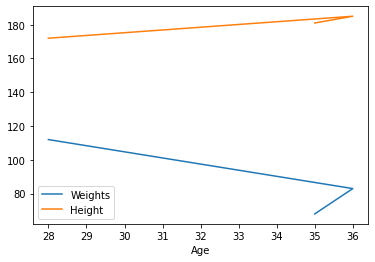

In [26]:
people.plot(kind="line", x = "Age", y = ["Weights",	"Height"])
plt.show()

In [27]:
#empty rows and columns
ind7 = ["alice", "bob", "Charles","Eugene"]
cc = pd.DataFrame(people_dict,columns=["Weights",	"Birth",	"Children",	"Hobby", "Height"], index=ind7)
cc

,Weights,Birth,Children,Hobby,Height
alice,68.0,1985.0,NaN,biking,NaN
bob,83.0,1984.0,3.0,dancing,NaN
Charles,112.0,1992.0,0.0,NaN,NaN
Eugene,NaN,NaN,NaN,NaN,NaN


In [28]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


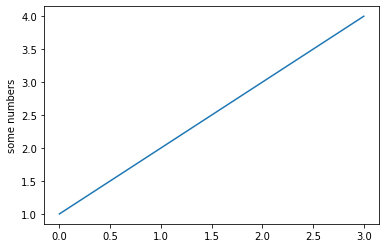

In [32]:
plt.plot([1,2,3,4])
plt.ylabel("some numbers")
plt.show()

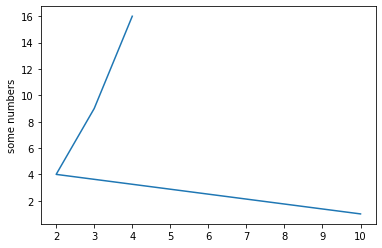

In [33]:
plt.plot([10,2,3,4],[1,4,9,16])
plt.ylabel("some numbers")
plt.show()

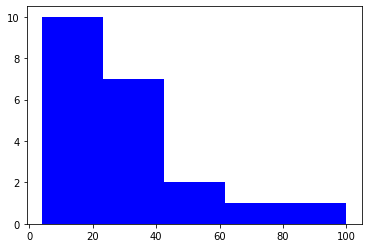

In [34]:
#histogram
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
numbins = 5
plt.hist(x,numbins,facecolor="blue")
plt.show()

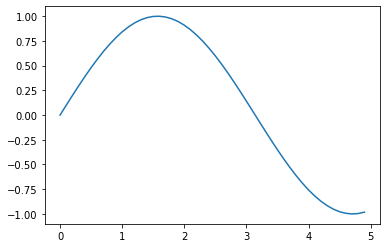

In [35]:
x = np.arange(0,5,0.1)
y = np.sin(x)
plt.plot(x,y)
plt.show()